# Python Data Science Handbook Notes 

This document contains notes I have taken on *Python Data Science Handbook*. I hope someone finds this helpful. 

Book citation: *Python Data Science Handbook* by Jake VanderPlas (O'Reilly). Copyright 2017 Jake VanderPlas, 978-1-491-91295-8.

# Preface

Data science comprises three distinct and overlapping areas: 
1. **Statistics**
2. **Computer science** - used for the design and use of algorithms to efficiently store, process, and visualize data
3. **Domain expertise** - necessary to formulate the right question and to put their answers in context

Important libraries: 
1. NumPy: manipulation of homogenous data
2. Pandas: manipulation of heterogenous data
3. SciPy: common scientific computing tasks
4. Matplotlib: visualizations
5. Scikit-Learn: machine learning

# Chapter 1: IPython: Beyond Normal Python

Need help: `?` for docmentation, `??` for source code, tab key for autocompletion

Every python object contains a docstring which contains a concise summary of the object and how to use it. Python has a built in ```help()``` function that prints the docstring. This method even works for functions or objects you create yourself. To create a docstring for our function we place a string literal in the first line.

Shortcuts
- `Ctrl-a` to move cursor to the begining of the line. 
- `Ctrl-e` to move cursor to the end of the line. 
- `Ctrl-k` to cut rexr from cursor to the end of the line. 
- `Ctrl-p` to access previous command in history.
- `Ctrl-n` to access next demand in history. 
    - Note: you can use Ctrl-p/Ctrl-n or the up/down arrow keys to search through history, but only by matching characters - at the begining of the line. 
- `Ctrl-l` to clear terminal screen. 
- `Ctrl-c` to interrupt current Python command. 

In [1]:
help(len)

In [2]:
len?

In [3]:
def square(a): 
    """Return the square of a."""
    return a**2

Because Python is so readable you can usually gain another level of insight by reading the source code of the object you're curious about. `??` can give a quick insight into the under the hood details. Sometimes you will notice that `??` does not display source code. This is generally because the object in question is not implemented in Python, but in C or some other language. If this is the case `??` will give you the same output as `?`. 

In [4]:
square??

Every Python object has various attribues and methods associated with it. Python has a built in `dir` function that returns a list of these, but the tab completion interface is much easier to use in practice. To see a list of all available attributes of an object, you can type the name of the object followed by a `.` and then the Tab key. If there is only a single option, pressing the Tab key will complete the line for you. Tab completion is also useful when importing objects from packages. 

In [5]:
#wildcard matching
# *Warning? #returns a list of every object in the namespace that ends with Warning

In [6]:
# str.*find*? #retruns a list of every string method that contains the word find somewhere in its name. 

Magic commands are prefixed by `%`. These magic commands are designed to succintly solve various common problems in standard data analysis. There are two kinds of magic commands: line magics (denoted by `%` and operate on a single line) and cell magics (denoted by `%%` and operate on multiple lines of input)

`%paste` pastes code into the cell and does so without indentation errors. This way you can copy code from online sources and paste with no troubles. 

`%cpaste` opens an interactive multiline prompt in which you can paste one or more chunks of code to be executed in a batch. 

`%run` is useful when you have created a myscript.py file you can execute this on Jupyter `%run myscript.py`. Note that any functions defined within the .py file are now available for use. 

`%timeit` determines the execution time of the single line python statement that follows it

`%magic` to access a general description of available magic functions 

`%lsmagic` to list all available magic functions

In [7]:
%timeit L = [n**2 for n in range(100)]

30.7 µs ± 518 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


Note that list comprehensions are faster than the equivalent for loop construction. 

The `In[]` object is a list which keeps track of the commands in order. The `Out[]` object is not a list but a dictionary mapping input numbers to their outputs. 

Note not all operations have outputs. E.g., import statments and print statements don't affect the output (yes print statments!). This makes sense if you think about how print is a function that returns `None`; for brevity any command that returns `None` is not added to Out. Where this can be useful is if you want to interact with past results. This can be very handy if you execute a very expensive computation and want to reuse the result. 

In [8]:
import math
math.sin(2)

0.9092974268256817

In [9]:
math.cos(2)

-0.4161468365471424

In [13]:
Out[9]*Out[8]

-0.37840124765396416

Underscore shortcuts and previous outputs: 
the variable _ a single underscore _ is kept updated with the previous output. You can use a double underscore to access the second-to-last output and a triple underscore to access the third-to-last output. It stops there! 

A shorthand for `Out[X]` is `_X` (i.e., a single underscore followed by the line number)

In [17]:
print(_)

-0.37840124765396416


In [18]:
_13

-0.37840124765396416

Supressing the output of a command: the easiest way is to add a semicolon `;` to the end of the line. Note that when you do this the result is computed silently, and the result is neither displayed on the screen or stored in the Out dictionary.  

IPython gives you syntax for executing shell commands directly from within the IPython terminal. Anything appearing after `!` on a line will be executed not by the python kernal, but by the system command line. The shell is a way to interact textually with your computer. Shell offers much more control of advanced tasks. You can use any command that works at the command line in IPython by prefixing it with the `!` character. 

In [19]:
!ls

Coding comparisons .ipynb
Cogs 164 project.ipynb
Drawing to Learn Science
Hate-Crimes-in-SD
Python Data Science Handbook Notes .ipynb
README.md
Rap
SD_collisions
Unique-words
Untitled.ipynb
group044
sarah_functions.py


In [20]:
!pwd

/Users/sarahamiraslani/Documents/GitHub


Shell commands can also be made to interact with the IPython namespace. For example, you can save the output of any shell command to a Python list using the assignment operator. Note that these results are not returned as lists, but as a special shell return type defined in Ipython. This looks and acts a lot like a Python list, but has additional functionality

In [21]:
directory = !pwd

In [22]:
print(directory)

['/Users/sarahamiraslani/Documents/GitHub']


In [23]:
type(directory)

IPython.utils.text.SList

#### Profiling and and Timing Code

In the process of developing code and creating data processing pipelines, there are trade-offs you can make between various implementations. Early in developing your algorithm, it can be counterproductive to worry about these things. "premature optimization is the root of all evil". But once you have your code working, it can be useful to dig into its efficiency a bit. 

`%time` to time the execution of a single statement
`%%timeit` to time the repeated execution of snippets of code. 
`%timeit` to time repeated execution of a single statement for more accuracy
`%prun` to run the code with the profiler
`%lprun` to run the code with the line-by-line profiler
`%memit` to measure the memory use of a single statement
`%mprun` to run code with the line-by-line memory profiler
Note: the last four commands are not bundled with Ipython, you need to install the `line_profiler` and `memory_profiler` extensions

In [24]:
%timeit sum(range(100))

984 ns ± 12 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [25]:
%%timeit
total=0

for i in range(100): 
    for j in range(100): 
        total += i *(-1)**j

3.54 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Chapter 2: Introduction to NumPy

It will help us to think of all data as arrays of numbers. No matter what the data are, the first step in making them analyzable will be to transform them into arrays of numbers. In some ways, NumPy arrays are like Python's built-in list type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size. Numpy arrays form the core of nearly the entire ecosystem of data science tools in Python.  

In [26]:
import numpy as np

Effective data-driven science and computation requires understanding how data is stored and manipulated.

The standard Python implementation is written in C. This means that every Python object is a cleverly disguised C structure. 

**A python list is more than just a list**
- because of python's dynamic typing we can create heterogenous lists. This flexibility comes at a cost: to allow these flexible types, each item in the list must contain its own type info, reference count, and other information – that is, each item is a complete Python object. In the special case that all variables are of the same type, much of this information is redundant: it can be much more efficient to store data in a fixed-type array. 

At the implementation level, the array contains a single pointer to one contiguous block of data. The Python list on the other hand contains a pointer to a block of pointers, each of which in turn points to a full python object like the Python integer we saw earlier. Again the advantage of a list is flexibility: because each list element is a full structure containing both data and type information, the list can be filled witth data of any desired type. Fixed-type NumPy-style arrays lack this flexibility, but are much more efficient for sotring and manipulating data. 

**Fixed-Type Arrays in Python**
Python offers several different options for storing data in efficient, fixed-type data buffers. The built in `array` module can be used to create dense arrays of a uniform type. 

In [27]:
import array

L = list(range(10))
A = array.array('i',L)
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Here `'i'` is a type code indicating the contents are integers. 

However, the `ndarray` object of the NumPy package is much more useful. Python's `array` object provides an efficient way to store array-based data, but NumPy adds to this efficient operations on that data. Remember that unlike Python lists, NumPy is constrained to arrays that all contain the same type. If the types do not match, NumPy will upcast if possible. If we want to explicitly set the data type of the resulting array, we can use the `dtype` keyword. Finally unlike Python lists, NumPy arrays can be explicitly multidimensional

In [28]:
#integer array
np.array([1,4,2,5,3])

array([1, 4, 2, 5, 3])

In [29]:
#Numpy will upcast if types don't match
np.array([3.14,4,2,3])

array([3.14, 4.  , 2.  , 3.  ])

In [30]:
np.array([1,2,3,4],dtype='float32')

array([1., 2., 3., 4.], dtype=float32)

In [31]:
#nested lists result in multidimensional arrays
np.array([range(i,i+3) for i in [2,4,6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

### Creating Arrays from Scratch
Especially for larger arrays, it is more efficient to create arrays from scartch using routines built into NumPy. 

In [32]:
# Create a length-10 integer array filled with zeros 
np.zeros(10,dtype=int)

# Create a 3x5 floatting-point array filled with 1s
np.ones((3,5),dtype=float)

# Create a 3x5 array filled with 3.14
np.full((3,5),3.14)

# Create an array filled with a linear sequence 
# Starting at 0, ending at 20, stepping by 2
# This is similar to the built in range() function
np.arange(0,20,2)

# Create an array of five values evenly spaced between 0 and 1
np.linspace(0,1,5)

# Create a 3x3 array of uniformly distributed random values between 0 and 1
np.random.random((3,3))

# Create a 3x3 array of normally distributed random values with mean 0 and standard deviation of 1
np.random.normal(0,1,(3,3))

# Create a 3x3 array of random integers in the interval [0,10]
np.random.randint(0,10,(3,3))

# Create a 3x3 identity matrix
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### The Basics of NumPy Arrays 
Data manipulation in Python is nearly synonymous with NumPy array manipulation: even newer tools like Pandas are built around the NumPy array. 

Basic array manipulation: 
- **atributes of arrays** - determining the size, shape, memory consumption, and data types of arrays
- **indexing of arrays** - getting and setting the value of individual array elements
    - in a one dimensional array, you can access the ith value (counting from zero) by specifying the desired index in square brackets, just as with Python lists
    - to index from the end of the array you can use negative indices
    - in a multidimensional array, you can access items using a comma-seperated tuple of indices
- **slicing of arrays** - getting and setting smaller subarrays within a larger array
    - Just as we can use square brackets to access individual array elements, we can also use them to access subarrays with the slice notation, marked by the colon `:` character. 
    - `x[start:stop:step]`
        - if any of these are unspecified, they default to the values start=0, stop = size of dimension, step = 1
        - a potentially confusing case is when the step value is negative
    - multidimensional slices work in the same way, with multiple slices seperated by commas
    - to access a single row or column of an array you can combine indexing and slicing using an empty slice marked by a `:`
    - one important thing to know about array slices is that they return views rather than copies of the array data. 
        - this default behavior is actually quite useful: it means that when we work with large datasets, we can access and process pieces of these datasets without the need to copy the underlying data buffer
            - this is one area in which NumPy array slicing differs from Python list slicing: in lists slices will be copies 
- **reshaping of arrays** - changing the shape of a given array
- **joining and splitting of arrays** - combining multiple arrays into one, and splitting one array into many

In [33]:
x1 = np.random.randint(10,size=6) # one dimensional array
x2 = np.random.randint(10,size=(3,4)) # two-dimensional array
x3 = np.random.randint(10, size = (3,4,5)) # three-dimensional array

In [34]:
x1[0]
x2[0,0]

1

You can also modify values using any of the above index notation. Keep in mind that unlike Python lists, NumPy arrays have a fixed type. This means that, for example, if you attempt to insert a floating-point value to an integer array, the value will be silently truncated. 

In [35]:
x2[0,0]=12
x1[0]=3.144444 # will be truncated
x1

array([3, 4, 6, 1, 2, 1])

In [36]:
x = np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [37]:
x[:5] #first five elements
x[5:] #elements after index 5
x[4:7] #middle subarray
x[::2] #every other element
x[1::2] #every other element starting at index 1

array([1, 3, 5, 7, 9])

In [38]:
x2

array([[12,  4,  1,  3],
       [ 5,  4,  8,  4],
       [ 0,  3,  0,  6]])

In [39]:
x2[:2,:3] #two rows and three columns
x2[:3,::2] #all rows every other column

#subarray dimensions can even be reversed together
x2[::-1,::-1]

array([[ 6,  0,  3,  0],
       [ 4,  8,  4,  5],
       [ 3,  1,  4, 12]])

In [40]:
print(x2[:,0]) # first column of x2
print(x2[0,:]) # first row of x2

[12  5  0]
[12  4  1  3]


In [41]:
print(x2)

[[12  4  1  3]
 [ 5  4  8  4]
 [ 0  3  0  6]]


In [42]:
# Let's extract a subarray from this: 
x2_sub = x2[:2,:2]
print(x2_sub)

[[12  4]
 [ 5  4]]


In [43]:
#Now if we modify this subarray we will see that the original array is changed!
x2_sub[0,0]=99
print(x2)

[[99  4  1  3]
 [ 5  4  8  4]
 [ 0  3  0  6]]


### Creating Copies of Arrays
It is useful to instead explicitly copy the data within an array or a subarray. This can be most easily done with the `copy()` method. 

In [44]:
x2_sub_copy=x2[:2,:2].copy() #if we modify this subarray, the original array is not touched
x2

array([[99,  4,  1,  3],
       [ 5,  4,  8,  4],
       [ 0,  3,  0,  6]])

### Reshaping Arrays

- `reshape()`: note that for this to work, the size of the initial array must match the size of the reshaped array. Whenever possible, the `reshape()` method will use a no-copy view of the initial array, but this is not always the case. 

- Another common reshaping pattern is the conversion of a one-dimensional array into a two dimensional row or column matrix. You can do this with the `reshape()` method or by making use of the `newaxis` keyword within a slice operation. 

In [45]:
grid = np.arange(1,10).reshape((3,3))
grid

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [46]:
x=np.array([1,2,3])

# row vector via reshape
x.reshape(1,3)

# row vector via newaxis
x[np.newaxis,:]

array([[1, 2, 3]])

In [47]:
# column vector via reshape
x.reshape(3,1)

# column vector via newaxis
x[:,np.newaxis]

array([[1],
       [2],
       [3]])

### Array Concatenation and Splitting 
It is possible to combine multiple arrays into one and to conversley split a single array into multiple arrays. 

Concatenation
- `np.concatenate`
- `np.vstack`
- `np.hstack`
- `np.dstack` will stack arrays along the third axis

Splitting - for each of these we can pass a list of indices giving the split points. Notice that N split points leads to N + 1 subarrays. 
- `np.split`
- `np.hsplit`
- `np.vsplit`
- `np.dspllit` will split arrays along the third axis

In [48]:
x = np.array([1,2,3])
y = np.array([3,2,1])
z = np.array([99,99,99])

np.concatenate([x,y])
np.concatenate([x,y,z])

# np.concatenate can also be used for two-dimensional arrays
grid = np.array([[1,2,3],[3,4,5]])
grid

array([[1, 2, 3],
       [3, 4, 5]])

In [49]:
# Concatenate along the first axis
np.concatenate([grid,grid])

array([[1, 2, 3],
       [3, 4, 5],
       [1, 2, 3],
       [3, 4, 5]])

In [50]:
# Concatenate along the second axis 
np.concatenate([grid,grid],axis=1)

array([[1, 2, 3, 1, 2, 3],
       [3, 4, 5, 3, 4, 5]])

In [53]:
# Vertically stack the arrays
np.vstack([x,grid])

# Horizontally stack the arrays 
y = np.array([[99],[99]])
np.hstack([grid,y])

array([[ 1,  2,  3, 99],
       [ 3,  4,  5, 99]])

In [56]:
# Splitting of arrays
x = [1,2,3,99,99,3,2,1]
x1,x2,x3 = np.split(x,[3,5])
print(x1,x2,x3)

[1 2 3] [99 99] [3 2 1]


In [60]:
grid = np.arange(16).reshape((4,4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [61]:
upper, lower = np.vsplit(grid,[2])

In [65]:
print(upper,'\n\n', lower)

[[0 1 2 3]
 [4 5 6 7]] 

 [[ 8  9 10 11]
 [12 13 14 15]]


In [68]:
left, right = np.hsplit(grid,[2])
print(left,'\n\n', right)


[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]] 

 [[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


### Computation on NumPy Arrays: Universal Functions
Numpy is so important in the Python data science world because it provides a flexible interface to optimize computation with arrays. Computations on NumPy arrays can be very fast, ot it can be very slow. The key to making it fast is to use *vectorized* operations which are implemented through NumPy's *universal functions* (ufuncs). Ufuncs main purpose is to quickly execute repeated operations on values in NumPy arrays. Ufuncs can also operate on multidimensional arrays. 

Python can be slow in situations where many small operations are being repeated (e.g., looping over arrays to operate on each element). The vectorized approach is designed to push the loop into the compiled layer that underlies NumPy, leading to much faster execution. 

Computations using vectorization through ufuncs are nearly always more efficient than their counterpart implemented through Python loops (especially as the arrays grow in size). 

Arithmetic operations implemented in NumPy
- `np.add` - additon 
- `np.subtract` - subtract
- `np.negative` - unary negation
- `np.multiply`- multiply
- `np.divide` - division
- `np.floor_divide` - floor division
- `np.power` - exponentiation
- `np.mod` - modulus/remainder
- `np.absolute` - absolute value

# Chapter 3: Data Manipulation with Pandas

Pandas is built on top of NumPy and provides an efficient implementation of a DataFrame (multidimensional arrays with attached row and column labels, and often have heterogenous types and/or missing data). 

NumPy's limitations become clear when we need more flexibility (attaching labels to data, working with missing data, etc.) and when attempting operations that do not map well to element-wise broadcasting (groupings, pivots, etc.)

# Chapter 4: Visualization with Matplotlib

Matplotlib is built on NumPy arrays and plays well with many operating systems and graphics backends. You can count on it to work regardless of which operating system you are using or which output format you wish. 

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.style.use('classic')

**`show()` or no `show()`?** How you view your Matplotlib plots depends on the context (in a script, Ipython termnial, or Ipython notebook). If you are using Matplotlib from within a script, the function `plt.show()` is useful. `plt.show` starts an event loop, looks for all currently active figure objects and opens one or more interactive windows that display your figure or figures. 

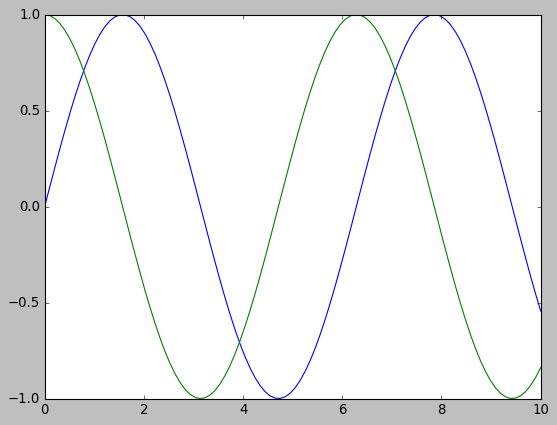

<Figure size 640x480 with 0 Axes>

In [12]:
# ----- file: myplot.py-----
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,10,100)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

plt.show()

You can then run this script from the command-line prompt, which will result in a window opening with your figure displayed. 

One thing to be aware of is that the `plt.show()` command should be used only once per python session, and it is most often seen at the very end of the script. Multiple `show()` commands can lead to unpredictable backend-dependent behavior, and should mostly be avoided. 

Ipython is built to work well with Matplotlib if you specify Matplotlib mode. To enable this mode you can use the `%matplotlib` magic command. Using plt.show() in Matplotlib mode is not required. 
- `plt.draw()` will force an update if some changes you made to a figure are not showing up. 

Plotting interactively within an IPython notebook can be done with the `%matplotlib` magic command. In the IPython notebook, you also have the option of embedding graphics directly in the notebook, with two possible options. 
- `%matplotlib notebook` will lead to interactive plots embedded within the notebook
- `%matplotlib inline` will lead to static images of your plot embedded in the notebook. 

**Saving Figures to File**
- `fig.savefig('my_fig.png')` - will save an image to current working directory
    - other supported formats: jpeg, jpg, pdf, ... etc

**Two Interfaces for the Price of One**
- a potentially confusing feature of Matplotlib is its dual interfaces: a convenient MATLAB-style based inteerface and a more powerful object-oriented interface. For more simple plots the choice of which style to use is largely a matter of preference, but the object-oriented approach can become a necessity as plots become more compllicated. In most cases, the difference is as small as switching `plt.plot()` to `ax.plot`

Matplotlib was originally written as a Pytthon alternative for MATLAB users, and much of its syntax reflects that. 

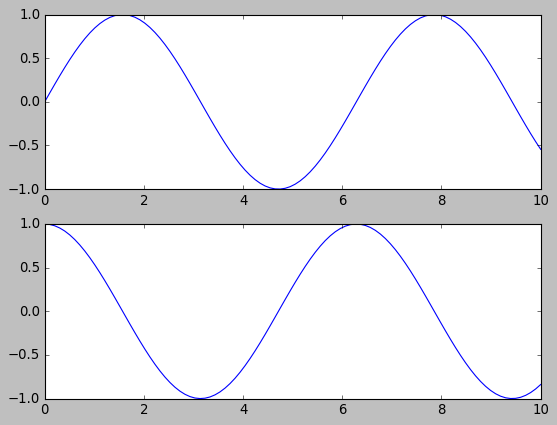

In [15]:
# First create a grid of plots 
# ax will be an array of two Axes objects

fig, ax = plt.subplots(2)

# call plot() method on the appropriate object 
ax[0].plot(x,np.sin(x))
ax[1].plot(x,np.cos(x))

### Simple Line Plots

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt 
plt.style.use('seaborn-whitegrid')

import numpy as np

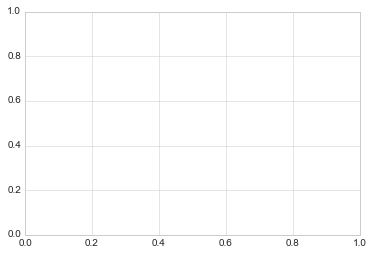

In [21]:
fig = plt.figure()
ax = plt.axes()

The figure (an instance of the class `plt.figure`) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels. 

The axes (an instance of the class `plt.axes` contains the plot elements that make up our visualization. 

If we want to create a single figure with multiple lines, we can simply call the `plot` function multiple times. 

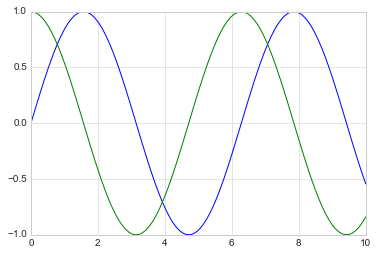

In [22]:
plt.plot(x,np.sin(x))
plt.plot(x,np.cos(x))

`plt.plot()`

**Adjusting the Plot: Line Colors and Styles**
- `color`: accepts a string argument representing virtually any color. Color can be specified in a variety of ways
    - specify by color name e.g., `blue`
    - specify by short color code e.g., `g`
    - specify by Grayscale between 0 and 1
    - specify by Hex code (RRGGB)
    - specify by RGB tuple, values 0 and 1
    - all HTML color names supported
- `linestyle` 
     - `"solid"` or `"-"`
     - `"dashed"` or `"--"`
     - `"dashdot"` or `"-."`
     - `"dotted"` or `:`
     
**Adjusting Axes Limits**
- `plt.xlim()`
- `plt.ylim()`
- `plt.axis(xmin,xmax,ymin,ymax)` allows you to set the x and y limots with a single call
    - `plt.axis("tight")` allows you to automatically tighten the bounds around the current plot
    - `plt.axis("equal")` ensures an equal aspect ratio so that on your screen, one unit in x is equal to one unit in y. 
    
**Labeling Plots**
- `plt.title()`
- `plt.xlabel()`
- `plt.ylabel()`
- `plt.legend()`

**Note**
- while most `plt` functions translate directly to `ax` method (such as `plt.plot()` --> `ax.plot()`, `plt.legend` --> `ax.legend`, etc) this is not the case for all commands. 
    - `plt.xlabel()` --> `ax.set_xlabel()`
    - `plt.ylabel()` --> `ax.set_ylabel()`
    - `plt.xlim()` --> `ax.set_xlim()`
    - `plt.ylim()` --> `ax.set_ylim()`
    - `plt.title()` --> `ax.set_title()`
- Rather than calling these functions individually, it is often more convenient to use the `ax.set()` method to set all the properties at once. 

**Scatter plots**
- `plt.plot()`
- `plt.scatter()`
    - `alpha` keyword adjusts the transparency level

The primary difference of `plt.scatter()` is that it can be used to create scatter plots where the properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data. Also as datasets get larger than a few thousand points, `plt.plot` can be noticeably more efficient than `plt.scatter`.

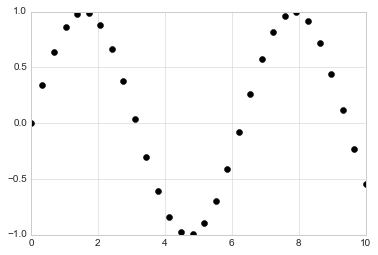

In [25]:
x = np.linspace(0,10,30)
y = np.sin(x)

plt.plot(x,y,'o',color = 'black')

(0, 1.8)

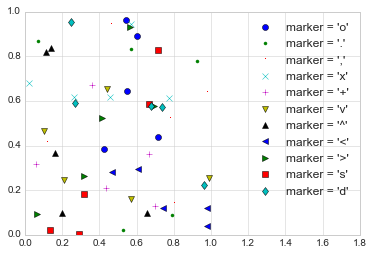

In [30]:
rng = np.random.RandomState(0)

for marker in ['o','.',',','x','+','v','^','<','>','s','d']:
    plt.plot(rng.rand(5),rng.rand(5), marker, 
            label = "marker = '{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0,1.8)

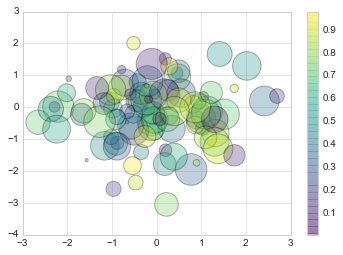

In [33]:
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x,y,c=colors, s= sizes, 
            alpha=0.3, cmap='viridis')

plt.colorbar()

The color and size of points can be used to convey information in the visualization in order to illustrate multidimensional data. 

Text(0, 0.5, 'sepal width (cm)')

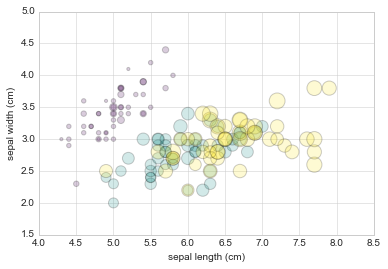

In [38]:
from sklearn.datasets import load_iris

iris = load_iris()
features = iris.data.T

plt.scatter(features[0],features[1],alpha=0.2, 
           s=100*features[3],c=iris.target,cmap='viridis')

plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

**Basic Errorbars**

<ErrorbarContainer object of 3 artists>

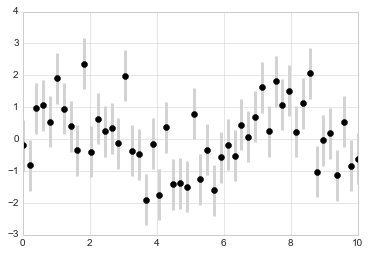

In [41]:
x = np.linspace(0,10,50)
dy=0.8

y = np.sin(x)+dy * np.random.randn(50)

plt.errorbar(x,y,yerr=dy,fmt='o',color='black',
            ecolor='lightgray',elinewidth=3,
            capsize=0)

**Density and Contour Plots** 
Sometimes it is useful to display three-dimensional data in two dimensions using contours of color-coded regions. 
- `plt.contour` for contour plots
- `plt.contourf` for filled contour plots
- `plt.imshow` for showing images

In [42]:
def f(x,y):
    return np.sin(x)**10+np.cos(10+y*x)*np.cos(x)

In [43]:
x = np.linspace(0,5,50)
y = np.linspace(0,5,40)

X,Y = np.meshgrid(x,y)
Z = f(X,Y)

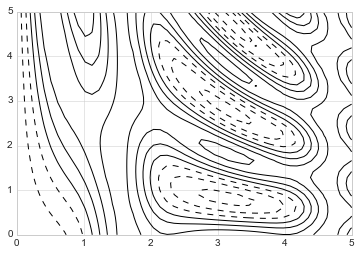

In [44]:
plt.contour(X,Y,Z, colors = 'black')

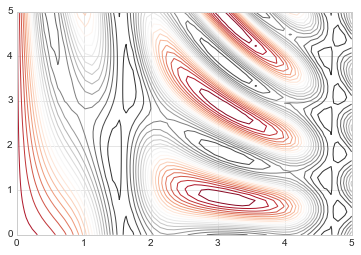

In [45]:
plt.contour(X,Y,Z,20,cmap='RdGy')

With plt.contour the color steps are discrete rather than continous, which is not always desired. A better way to handle this is to use the `plt.imshow()` function, which interprets a two-dimensional grid of data as an image. 
- `plt.imshow()` doesn't accept an x and y grid, so you must mannually specify the extent `[xmin, xmax, ymin, ymax]'
- `plt.imshow()` by default follows the standard image array definition where the origin is in the upper left, not the lower left. This must be changed when showing gridded data. 

(0.0, 5.0, 0.0, 5.0)

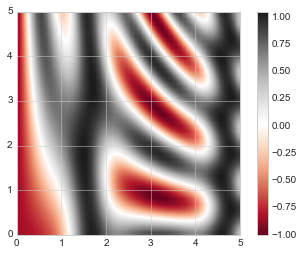

In [48]:
plt.imshow(Z, extent=[0,5,0,5],
           origin='lower', cmap='RdGy')

plt.colorbar()
plt.axis(aspect='images')

### Histograms, Binnings, and Density

/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.00484427, 0.        , 0.        , 0.00968853, 0.0145328 ,
        0.0290656 , 0.03390986, 0.04844266, 0.07266399, 0.12595092,
        0.12595092, 0.17923785, 0.18408211, 0.22768051, 0.33425436,
        0.41660688, 0.40691835, 0.41176262, 0.38754129, 0.37300849,
        0.33909863, 0.26159037, 0.22283624, 0.26159037, 0.13079518,
        0.06781973, 0.07266399, 0.05813119, 0.01937706, 0.02422133]),
 array([-3.5809548 , -3.37452518, -3.16809557, -2.96166595, -2.75523633,
        -2.54880671, -2.3423771 , -2.13594748, -1.92951786, -1.72308824,
        -1.51665862, -1.31022901, -1.10379939, -0.89736977, -0.69094015,
        -0.48451053, -0.27808092, -0.0716513 ,  0.13477832,  0.34120794,
         0.54763755,  0.75406717,  0.96049679,  1.16692641,  1.37335603,
         1.57978564,  1.78621526,  1.99264488,  2.1990745 ,  2.40550411,
         2.61193373]),
 <a list of 1 Patch objects>)

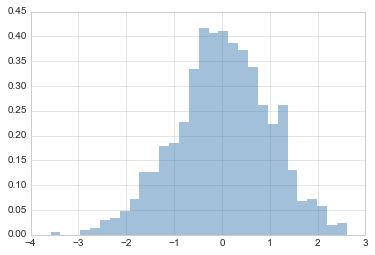

In [51]:
data = np.random.randn(1000)
plt.hist(data, bins = 30, normed = True, alpha = 0.5, 
        histtype = 'stepfilled',color = 'steelblue',
        edgecolor='none')

(array([0.0027847 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.0027847 , 0.        , 0.0027847 , 0.0111388 ,
        0.0111388 , 0.0167082 , 0.0222776 , 0.0222776 , 0.0445552 ,
        0.0668328 , 0.0946798 , 0.13366559, 0.12252679, 0.13366559,
        0.17265139, 0.18657489, 0.17265139, 0.16151259, 0.23113009,
        0.17543609, 0.17543609, 0.19492899, 0.13088089, 0.111388  ,
        0.083541  , 0.0779716 , 0.0696175 , 0.0501246 , 0.0334164 ,
        0.027847  , 0.0139235 , 0.0139235 , 0.0055694 , 0.0083541 ]),
 array([-5.45103686, -5.09193174, -4.73282661, -4.37372149, -4.01461636,
        -3.65551124, -3.29640611, -2.93730099, -2.57819586, -2.21909074,
        -1.85998561, -1.50088049, -1.14177536, -0.78267024, -0.42356511,
        -0.06445999,  0.29464514,  0.65375026,  1.01285539,  1.37196051,
         1.73106564,  2.09017076,  2.44927589,  2.80838101,  3.16748614,
         3.52659126,  3.88569639,  4.24480151,  4.60390664,  4.96301176,
         5.32211

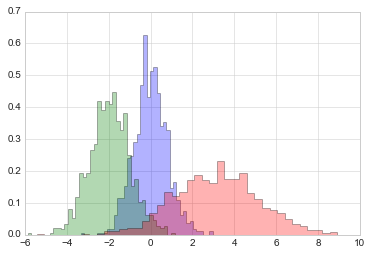

In [54]:
x1 = np.random.normal(0,0.8,1000)
x2 = np.random.normal(-2,1,1000)
x3 = np.random.normal(3,2,1000)

kwargs=dict(histtype='stepfilled',alpha=0.3, normed = True, bins=40)

plt.hist(x1,**kwargs)
plt.hist(x2,**kwargs)
plt.hist(x3,**kwargs)

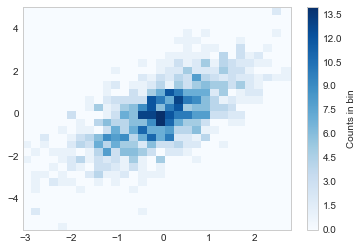

In [58]:
mean = [0,0]
cov = [[1,1],[1,2]]

x,y = np.random.multivariate_normal(mean,cov,1000).T



plt.hist2d(x,y,bins=30,cmap='Blues')
cb = plt.colorbar()
cb.set_label('Counts in bin')

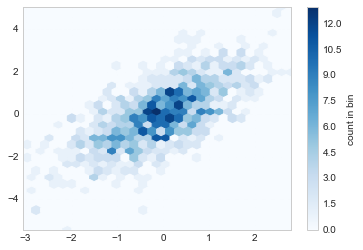

In [59]:
# Hexagonal binnings 
plt.hexbin(x,y,gridsize=30,cmap='Blues')
cb = plt.colorbar(label='count in bin')

**Kernal density estimation** can be thought of as a way to "smear out" the points in space and add up the result to obtain a smooth function. 